In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scienceplots
plt.style.use(['science','grid'])

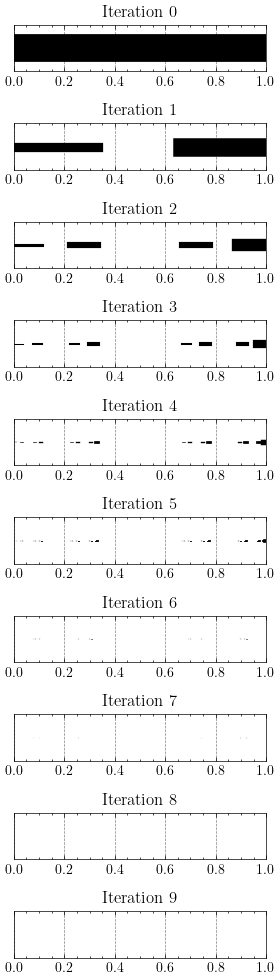

In [8]:
def calculate_segments(n):

    # Start with the full segment (0, 1) and probability 1
    segments = [(0, 1, 1)]  
    for _ in range(n):
        new_segments = []
        for start, end, prob in segments:
            third = (end - start) / 3
            left_segment = (start, start + third, prob * 1/3)  # Left third with 1/3 probability
            right_segment = (end - third, end, prob * 2/3)     # Right third with 2/3 probability
            new_segments.extend([left_segment, right_segment])
        segments = new_segments
    return segments

def plot_cantor_set(iterations):

    fig, axs = plt.subplots(iterations, 1, figsize=(3, iterations*1))
    for n in range(iterations):
        segments = calculate_segments(n)
        for start, end, prob in segments:
            axs[n].plot([start, end], [0, 0], linewidth=prob * 20, color='black')  # Adjust linewidth based on probability
        axs[n].set_xlim([0, 1])
        axs[n].set_ylim([-1/((n+1)**2), 1/((n+1)**2)])
        axs[n].set_yticks([])
        axs[n].set_title(f"Iteration {n}")

    plt.tight_layout()
    plt.show()

# Number of iterations to plot
num_iterations = 10
plot_cantor_set(num_iterations)


plot $D_q$ in the range for q $\in [-20,20]$

In [3]:
def getRenyiDimension(q):
    term1 = np.log(float(2)**(q) + 1)
    term2 = - q * np.log(3)
    term3 = (1-q) * np.log(3)
    renyi = (term1 + term2) / term3

    return renyi

In [4]:
# 
qMin = -20
qMax = 20
q_ = np.arange(qMin, qMax+1)
Dq = np.zeros(q_.shape)

for i in range(len(q_)):
    q = q_[i]
    Dq[i] = getRenyiDimension(q)

/var/folders/gt/mfl3krb11tg0vm1rn1bxgmfh0000gn/T/ipykernel_69021/3726201848.py:5: RuntimeWarning: invalid value encountered in double_scalars
  renyi = (term1 + term2) / term3


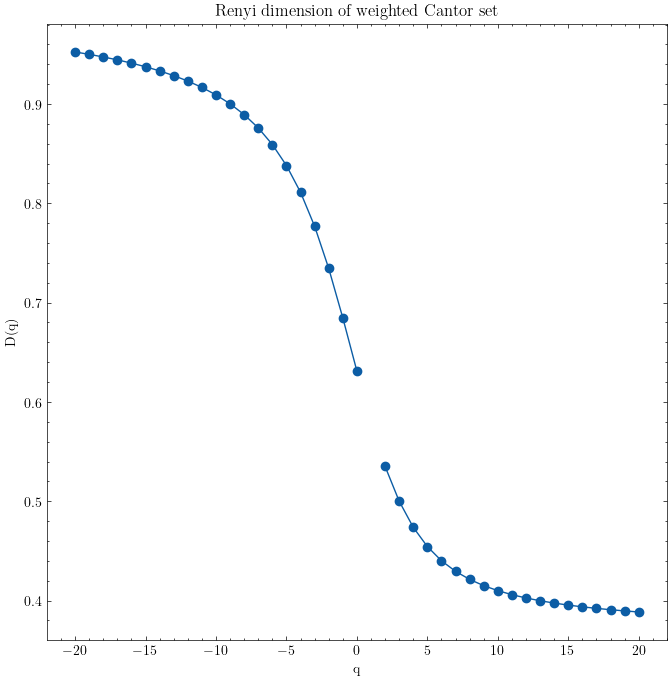

In [5]:
# visualize the result
plt.figure(figsize=(8,8))
plt.plot(q_, Dq, 'o-')
plt.xlabel('q')
plt.ylabel('D(q)')
plt.grid()
plt.title('Renyi dimension of weighted Cantor set')
plt.show()

The gap between [0,1] is due to the limit $\frac{1}{1-q}$ for $q=1$

c.) evaluate D1 and D2

In [6]:
import sympy as sp

# Define the variable
q = sp.symbols('q')

# Define the expression
expression = (sp.log(2**q + 1) - q * sp.log(3)) / ((1 - q) * sp.log(3))

# Applying L'Hospital's Rule for q = 1
# First, we need to compute the derivative of the numerator and the denominator with respect to q

numerator = sp.log(2**q + 1) - q * sp.log(3)
denominator = (1 - q) * sp.log(3)

# Derivatives
numerator_derivative = sp.diff(numerator, q)
denominator_derivative = sp.diff(denominator, q)

# Evaluate the derivatives for q = 1
result_lhospital_q1 = numerator_derivative.subs(q, 1) / denominator_derivative.subs(q, 1)

result_lhospital_q1.simplify()
print(result_lhospital_q1)

# evaluate D2 for q = 2
result_for_q_2 = expression.subs(q, 2).simplify()
print(result_for_q_2)

# print both in []
print("\n \nOutput for OpenTa:")
print([result_lhospital_q1, result_for_q_2])

-(-log(3) + 2*log(2)/3)/log(3)
-log(5)/log(3) + 2

 
Output for OpenTa:
[-(-log(3) + 2*log(2)/3)/log(3), -log(5)/log(3) + 2]


d.) Copmute $D_{-\infty}$ and $D_{\infty}$

In [7]:
# compute the symbolic expression for D_(-inf) and D_(+inf)
D_minus_inf = sp.limit(expression, q, -sp.oo)
D_plus_inf = sp.limit(expression, q, sp.oo)

print("\n \nOutput for OpenTa:")
print([D_minus_inf, D_plus_inf])



 
Output for OpenTa:
[1, -log(2)/log(3) + 1]
